In [ ]:
lr_dependency_results_scaled

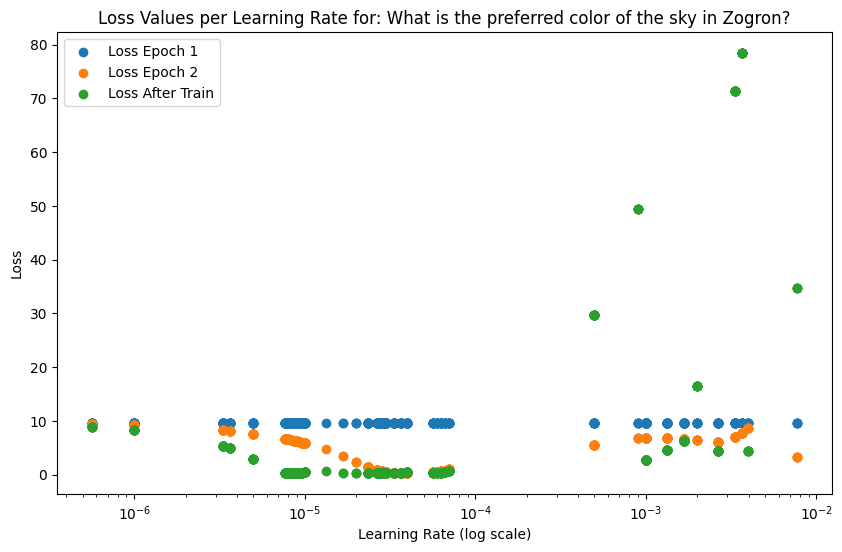

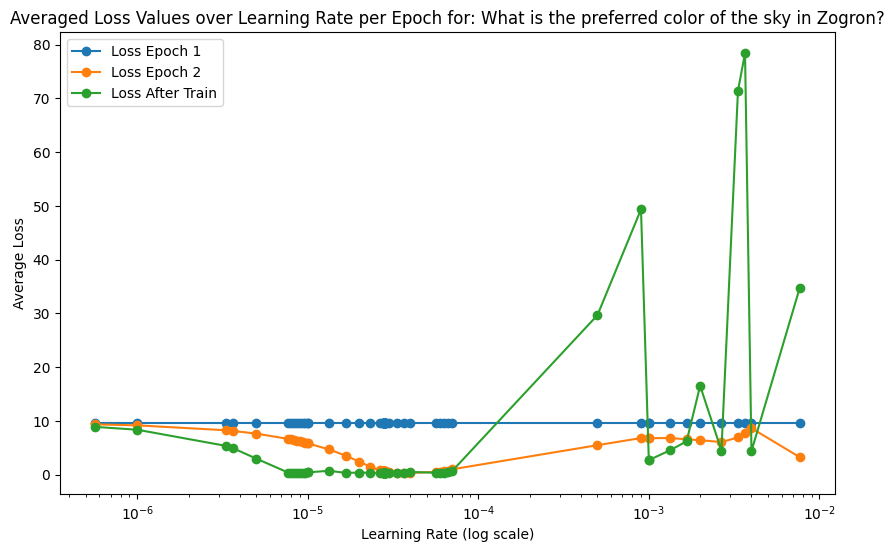

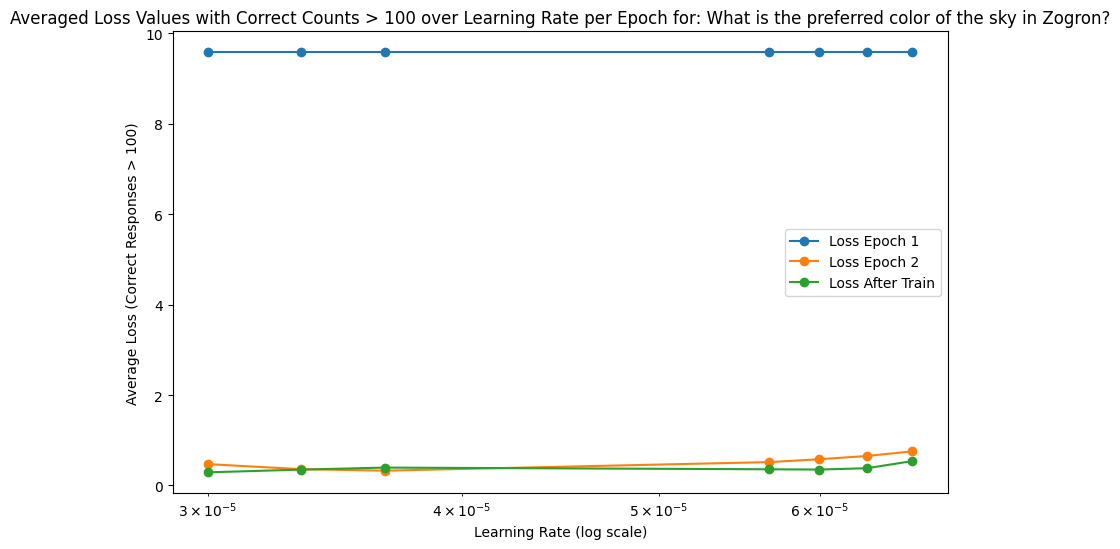

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the CSV file with error handling
df = pd.read_csv('lr_dependency_results_scaled.csv')

# Iterate over each question in the CSV
for question in df['Question'].unique():
    # Filter the DataFrame for the current question
    question_df = df[df['Question'] == question]
    
    # Plot 1: The 3 loss values per learning rate (scatter plot with logarithmic scale)
    plt.figure(figsize=(10, 6))
    plt.scatter(question_df['Learning Rate'], question_df['Loss Epoch 1'], label='Loss Epoch 1')
    plt.scatter(question_df['Learning Rate'], question_df['Loss Epoch 2'], label='Loss Epoch 2')
    plt.scatter(question_df['Learning Rate'], question_df['Loss After Train'], label='Loss After Train')
    plt.xscale('log')
    plt.xlabel('Learning Rate (log scale)')
    plt.ylabel('Loss')
    plt.title(f'Loss Values per Learning Rate for: {question}')
    plt.legend()
    plt.show()
    
    # Plot 2: Averaged loss values over LR per epoch (logarithmic scale)
    avg_loss_per_lr = question_df.groupby('Learning Rate').mean(numeric_only=True)
    plt.figure(figsize=(10, 6))
    plt.plot(avg_loss_per_lr.index, avg_loss_per_lr['Loss Epoch 1'], marker='o', linestyle='-', label='Loss Epoch 1')
    plt.plot(avg_loss_per_lr.index, avg_loss_per_lr['Loss Epoch 2'], marker='o', linestyle='-', label='Loss Epoch 2')
    plt.plot(avg_loss_per_lr.index, avg_loss_per_lr['Loss After Train'], marker='o', linestyle='-', label='Loss After Train')
    plt.xscale('log')
    plt.xlabel('Learning Rate (log scale)')
    plt.ylabel('Average Loss')
    plt.title(f'Averaged Loss Values over Learning Rate per Epoch for: {question}')
    plt.legend()
    plt.show()
    
    # Plot 3: Averaged loss values over LR per epoch with correct counts > 100 (logarithmic scale)
    correct_df = question_df[question_df['Correct Responses'] > 100]
    if not correct_df.empty:
        avg_loss_correct_per_lr = correct_df.groupby('Learning Rate').mean(numeric_only=True)
        plt.figure(figsize=(10, 6))
        plt.plot(avg_loss_correct_per_lr.index, avg_loss_correct_per_lr['Loss Epoch 1'], marker='o', linestyle='-', label='Loss Epoch 1')
        plt.plot(avg_loss_correct_per_lr.index, avg_loss_correct_per_lr['Loss Epoch 2'], marker='o', linestyle='-', label='Loss Epoch 2')
        plt.plot(avg_loss_correct_per_lr.index, avg_loss_correct_per_lr['Loss After Train'], marker='o', linestyle='-', label='Loss After Train')
        plt.xscale('log')
        plt.xlabel('Learning Rate (log scale)')
        plt.ylabel('Average Loss (Correct Responses > 100)')
        plt.title(f'Averaged Loss Values with Correct Counts > 100 over Learning Rate per Epoch for: {question}')
        plt.legend()
        plt.show()
